# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 3, <font color="orange">сложная часть</font>. Линейная и логистическая регрессии.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Правила оформления теоретических задач:**

* Решения необходимо оформить в виде $\LaTeX$ в markdown-ячейках. Иные способы (в т.ч. фотографии) не принимаются.
* Если вы не знаете $\LaTeX$, используйте ИИ-инструменты для оформления черновика решения. Примеры были показаны на лекции 2 по ИИ-инструментам.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. 
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):

* Задачи 1-4: скачайте первый ноутбук с условием задания со страницы курса.

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задача 5 &mdash; 80 баллов;
* Задача 6 &mdash; 70 баллов;
* Задача 7 &mdash; 50 баллов.

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [24]:
# Bot check

# HW_ID: fpmi_ad3_part2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [38]:
import time

import numpy as np
import pandas as pd
import seaborn as sns
from typing import Literal

# from PyQt5.QtWidgets.QMainWindow import metric
# from sklearn.linear_model import LinearRegression
# from sympy.physics.quantum.identitysearch import scipy
# from sympy.polys.numberfields.utilities import coeff_search
# 
# from adodbapi.examples.db_table_names import databasename
# from sklearn.model_selection import train_test_split

# sns.set(style="whitegrid", palette="Set2")

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [4]:
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, \
    accuracy_score
import matplotlib.pyplot as plt
from statistics import mode

---
### <font color="blue"><i>Легкая часть</i></font>

Задачи 1-4: скачайте первый ноутбук с условием задания со страницы курса.

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 5.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- a33928f56f5dc26d8a6754dd7365e93a -->
**1.** Реализуйте логистическую регрессию для двух вариантов поиска оценки параметров:
* простой градиентный спуск;
* стохастический градиентный спуск с `batch_size` элементами на каждой итерации.

Останавливайте итерации при выполнении хотя бы одного из двух условий:
* количество итераций превзошло число `max_iter`;
* оптимизируемый функционал изменился за итерацию не более чем на `tol`.

При выполнении каждой итерации с целью дальнейшего анализа сохраняйте текущее значение оптимизируемого функционала, а также затраченное время на итерацию.  **При реализации класса запрещено пользоваться ИИ-инструментами.**

*Замечания.*

1. Для чистоты эксперимента время шага внутри цикла нужно замерять от конца предыдущего шага до конца текущего, а не от начала текущего шага. Время измеряйте с помощью `from time import time`.

2. Иногда при подсчете сигмоиды и оптимизируемого функционала могут возникать вычислительные ошибки. Для их избежания существуют специальные трюки.
    * [How to Evaluate the Logistic Loss and not NaN trying](http://fa.bianp.net/blog/2019/evaluate_logistic/)
    * [Exp-normalize trick](https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/)<br>
3. Трюки не обязательно реализовывать самостоятельно, можете воспользоваться функциями для них из `numpy` или `scipy`:
    * [`numpy.logaddexp`](https://numpy.org/doc/stable/reference/generated/numpy.logaddexp.html);
    * [`scipy.special.logsumexp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.logsumexp.html).
4. Обратите внимание, что класс `LogisticRegression` &mdash; наследник класса `BaseEstimator`, это с легкостью позволит использовать наш класс в различных пайплайнах библиотеки `sklearn`.
4. Следите за качеством кода, комментируйте логические этапы кода. Несоблюдение этого требования может привести к потере баллов.


In [261]:
# При реализации класса запрещено пользоваться ИИ-инструментами.


class LogisticRegression(BaseEstimator):
    """Модель логистической регрессии.

    Параметры:
    method (Literal['gd', 'sgd']): Метод оптимизации ('gd' - градиентный спуск, 
        'sgd' - стохастический градиентный спуск).
    learning_rate (float): Константа скорости обучения, на которую домножаем градиент при обучении
    tol (float): Допустимое изменение функционала между итерациями.
    max_iter (int): Максимальное число итераций.
    batch_size (int): Размер выборки для оценки градиента (используется только при 'sgd').
    fit_intercept (bool): Добавлять ли константу в признаки.
    save_history (bool): Сохранять ли историю обучения.
    """

    def __init__(
            self,
            method: Literal["gd", "sgd"] = "gd",
            learning_rate: float = 0.5,
            tol: float = 1e-3,
            max_iter: int = int(1e4),
            batch_size: int = 64,
            fit_intercept: bool = True,
            save_history: bool = True,
    ):
        """Создает модель и инициализирует параметры."""
        self.intercept_ = None
        self.method = method
        self.learning_rate = learning_rate
        self.tol = tol
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.fit_intercept = fit_intercept
        self.save_history = save_history
        self.history = []  # История обучения
        self.n_iter_ = 0
        self.coef_ = None

    def loss(self, X: np.ndarray, Y: np.ndarray) -> float:
        # Вычисляем z для всех примеров сразу: (n_samples,) = X @ coef
        z = X @ self.coef_
        loss_values = Y * np.logaddexp(0, -z) + (1 - Y) * np.logaddexp(0, z)
        return np.sum(loss_values) / X.shape[0]

    @staticmethod
    def _sigmoid(x: np.ndarray) -> np.ndarray:
        # Создаем маску для положительных и отрицательных значений
        pos_mask = (x >= 0)
        neg_mask = ~pos_mask
        result = np.empty_like(x, dtype='float32')

        # Для положительных значений x вычисляем стандартно: 1 / (1 + exp(-x))
        result[pos_mask] = 1 / (1 + np.exp(-x[pos_mask]))

        # Для отрицательных x вычисляем через exp(x) для избежания переполнения exp(-x)
        exp_x = np.exp(x[neg_mask])
        result[neg_mask] = exp_x / (1 + exp_x)

        return result

    def _add_intercept(self, X: np.ndarray) -> np.ndarray:
        """Добавляет свободный коэффициент к матрице признаков.

        Параметры: X (np.ndarray): Исходная матрица признаков.

        Возвращает: np.ndarray: Матрица X с добавленным свободным
        коэффициентом.
        """
        X_copy = np.full((X.shape[0], X.shape[1] + 1), fill_value=1.0)
        X_copy[:, :-1] = X
        return X_copy

    def fit(self, X: np.ndarray, Y: np.ndarray) -> "LogisticRegression":
        """Обучает модель логистической регрессии с использованием GD/SGD с векторизацией."""
        if X.shape[0] != Y.shape[0]:
            raise ValueError("Количество строк в X и Y должно совпадать")

        # Добавляем свободный коэффициент, если нужно
        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        n_samples, n_features = X_copy.shape
        # Инициализируем коэффициенты с учетом свободного члена (n_features)
        self.coef_ = np.zeros(n_features, dtype='float32')
        self.n_iter_ = 0
        start_time = time.time()
        for epoch in range(self.max_iter):
            if self.method == 'gd':
                indices = np.arange(n_samples)
            else:
                indices = np.random.choice(n_samples, self.batch_size, replace=False)

            X_batch = X_copy[indices, :]
            Y_batch = Y[indices]
            error = Y_batch - self._sigmoid(X_batch @ self.coef_)
            grad = - (X_batch.T @ error) / len(indices)

            loss_before = self.loss(X_copy, Y)
            self.coef_ -= self.learning_rate * grad
            loss_after = self.loss(X_copy, Y)

            if self.save_history:
                self.history.append([loss_after, time.time() - start_time])

            if abs(loss_before - loss_after) < self.tol:
                break

            self.n_iter_ += 1
            start_time = time.time()

        self.intercept_ = self.coef_[-1]
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Возвращает предсказанные классы.

        Параметры: X (np.ndarray): Матрица признаков.

        Возвращает: np.ndarray: Предсказанные классы.
        """
        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        if X_copy.shape[1] != self.coef_.shape[0]:
            raise ValueError("Число признаков в X не соответствует числу коэффициентов модели")

        predictions = np.zeros(X_copy.shape[0])
        for i, row in enumerate(X_copy):
            predictions[i] = 1 if self._sigmoid(self.coef_ @ row) > 0.5 else 0
        return predictions

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """Возвращает вероятности классов 0 и 1.

        Параметры: X (np.ndarray): Матрица признаков.

        Возвращает: np.ndarray: Матрица вероятностей классов (n_samples,
        2).
        """
        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        if X_copy.shape[1] != self.coef_.shape[0]:
            raise ValueError("Число признаков в X не соответствует числу коэффициентов модели")

        prob_predictions = np.zeros(X_copy.shape[0])
        for i, row in enumerate(X_copy):
            prob_predictions[i] = self._sigmoid(self.coef_ @ row)
        return prob_predictions

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
Рассмотрим датасет [Diabetes Health Indicators](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

**Для данного задания будем рассматривать версию датасета** `diabetes_binary_5050split_health_indicators_BRFSS2015.csv`


Этот датасет содержит статистику здравоохранения и информацию об образе жизни, полученную в результате опросов вместе с меткой наличия/отсутствия диабета у участников. Среди признаков есть демографические данные, результаты лабораторных тестов и ответы на вопросы анкеты. Целевая переменная  `Diabetes_binary` определяет статус пациента: есть ли у него диабет или предиабет (`1`), или он здоров (`0`).




Рассмотрим некоторые признаки, представленные в датасете.

**Показатели здоровья**

- `HighBP`: Высокое кровяное давление (`1` = да, `0` = нет).

- `HighChol`: Высокий уровень холестерина (`1` = да, `0` = нет).

- `CholCheck`: Проверка уровня холестерина за последние 5 лет (`1` = да, `0` = нет).

- `BMI`: Индекс массы тела (рассчитывается как вес (кг) / рост² (м²)).

- `GenHlth`: Общая оценка здоровья (`1` = отличное, `2` = очень хорошее, ..., `5` = плохое).

**Образ жизни**
- `Smoker`: Статус курения (`1` = выкурил ≥100 сигарет за жизнь, `0` = нет).

- `PhysActivity`: Физическая активность вне работы (`1` = да, `0` = нет).

- `Fruits`: Регулярное употребление фруктов (`1` = не менее 1 раз в день, `0` = реже).

**Доступ к медицине**
- `AnyHealthcare`: Наличие медицинской страховки (`1` = да, `0` = нет).

- `NoDocbcCost`: Отказ от визита к врачу из-за стоимости (`1` = да, `0` = нет).



Скачайте файл и прочитайте его с помощью `pandas`.

In [250]:
dataset = pd.read_csv("../data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
dataset.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2aaab795bfe3971fb1c1e61c48002808 -->
Разделите выборку на обучающую и тестовую и выполните преобразование категориальных признаков.

In [251]:
# dataset = pd.get_dummies(dataset, columns=["HighBP", "HighChol", "CholCheck", "Smoker", "PhysActivity", "Fruits",
#                                            "AnyHealthcare", "NoDocbcCost"])

X = dataset.drop("Diabetes_binary", axis=1)
y = dataset.Diabetes_binary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Для интерпретации коэффициентов необходимо нормализовать данные. Воспользуемся для этого классом `StandardScaler` из библиотеки `sklearn`.

In [252]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 107ac5fe506b9f95aacd88457e0ec142 -->
**2.** Обучите две модели логистической регрессии с помощью методов
* простой градиентный спуск;
* стохастический градиентный спуск.

In [307]:
model1 = LogisticRegression(tol=1e-5)
y_train = np.array(y_train)
model1.fit(X_train, y_train)
history1 = model1.history
# print(history1)

model2 = LogisticRegression(method="sgd", batch_size=64 * 90, tol=5e-6)
y_train = np.array(y_train)
model2.fit(X_train, y_train)
history2 = model2.history
# print(history2)

Постройте график, на котором нанесите две кривые обучения, каждая из которых отображает зависимость оптимизируемого функционала от номера итерации метода. **Функционал должен быть одинаковый для всех моделей**. Нарисуйте также график зависимости этого функционала от времени работы метода. 

*Замечания:*
* Все графики должны быть информативны, с подписанными осями и т.д..
* Для чистоты эксперимента желательно не запускать в момент обучения другие задачи и провести обучение несколько раз, усреднив результаты.

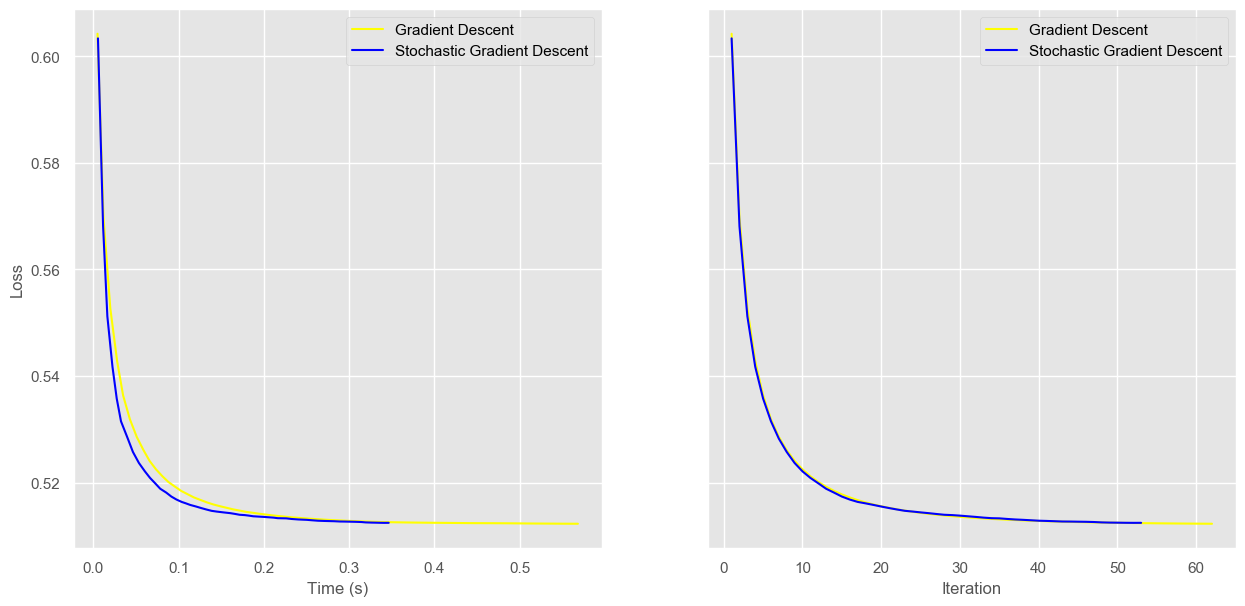

In [313]:
df_history1 = pd.DataFrame(history1, columns=["loss", "iter_time"])
df_history2 = pd.DataFrame(history2, columns=["loss", "iter_time"])

df_history1["cum_time"] = df_history1["iter_time"].cumsum()
df_history2["cum_time"] = df_history2["iter_time"].cumsum()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharey=True)

axes[0].plot(df_history1["cum_time"], df_history1["loss"], color='yellow', label='Gradient Descent')
axes[0].plot(df_history2["cum_time"], df_history2["loss"], color='blue', label='Stochastic Gradient Descent')
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Loss")
leg0 = axes[0].legend()
plt.setp(leg0.get_texts(), color='k')

axes[1].plot(df_history1.index + 1, df_history1["loss"], color='yellow', label='Gradient Descent')
axes[1].plot(df_history2.index + 1, df_history2["loss"], color='blue', label='Stochastic Gradient Descent')
axes[1].set_xlabel("Iteration")
leg1 = axes[1].legend()
plt.setp(leg1.get_texts(), color='k')

# plt.tight_layout()
plt.show()

Сделайте выводы. Что будет при обучении на датасете, если  увеличить количество объектов, а число признаков оставить прежним?

Если подобрать байтсайз, можно ускорить процесс обучения, но выход на плато происходит примерно в одно и то же время. Скорость всё-таки вырастает: примерно на 15-20%, при этом видно, что 
1) минимальный лосс одинаковый
2) SGD выходит на плато примерно также, как и обычный GD, но зато одна итерация быстрее.  

Что будет, если увеличить датасет? 

Обучение должно слега замедлиться, а лосс немного упасть, но ни то, ни другое особо измениться не должны. (при условии не многократных увеличений). 

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 4bb375127a9740dd293a61773746352d -->
**3.** Исследуйте влияние размер шага (`learning_rate`) на качество модели для двух режимов обучения (простой и стохастический градиентный спуск). Для каждого размера шага получите качество модели при использовании простого и стохастического градиентного спуска. Сравните качество полученных моделей по метрике `accuracy`.

In [270]:
learning_rate_list = np.logspace(-5, 3, 8)

In [283]:
all_history = {1: [], 2: []}
for learning_rate in learning_rate_list:
    model1 = LogisticRegression(learning_rate=learning_rate, tol=-1, max_iter=900)
    y_train = np.array(y_train)
    model1.fit(X_train, y_train)
    history1 = model1.history
    all_history[1].append(history1)
    model2 = LogisticRegression(method="sgd", batch_size=64 * 50, learning_rate=learning_rate, tol=-1, max_iter=900)
    y_train = np.array(y_train)
    model2.fit(X_train, y_train)
    history2 = model2.history
    all_history[2].append(history2)

Сделайте выводы

Learning Rate сильно влияет на скорость обучения (особенно видно на графиках ниже) и на количество итераций. Это важный гиперпараметр, от которого может зависеть не только скорость обучения, но и качество.  

Постройте кривые обучения для различных `learning_rate`. Не обязательно рассматривать все `learning_rate`, так как их слишком много, и график будет нагроможден. Возьмите около половины из них.

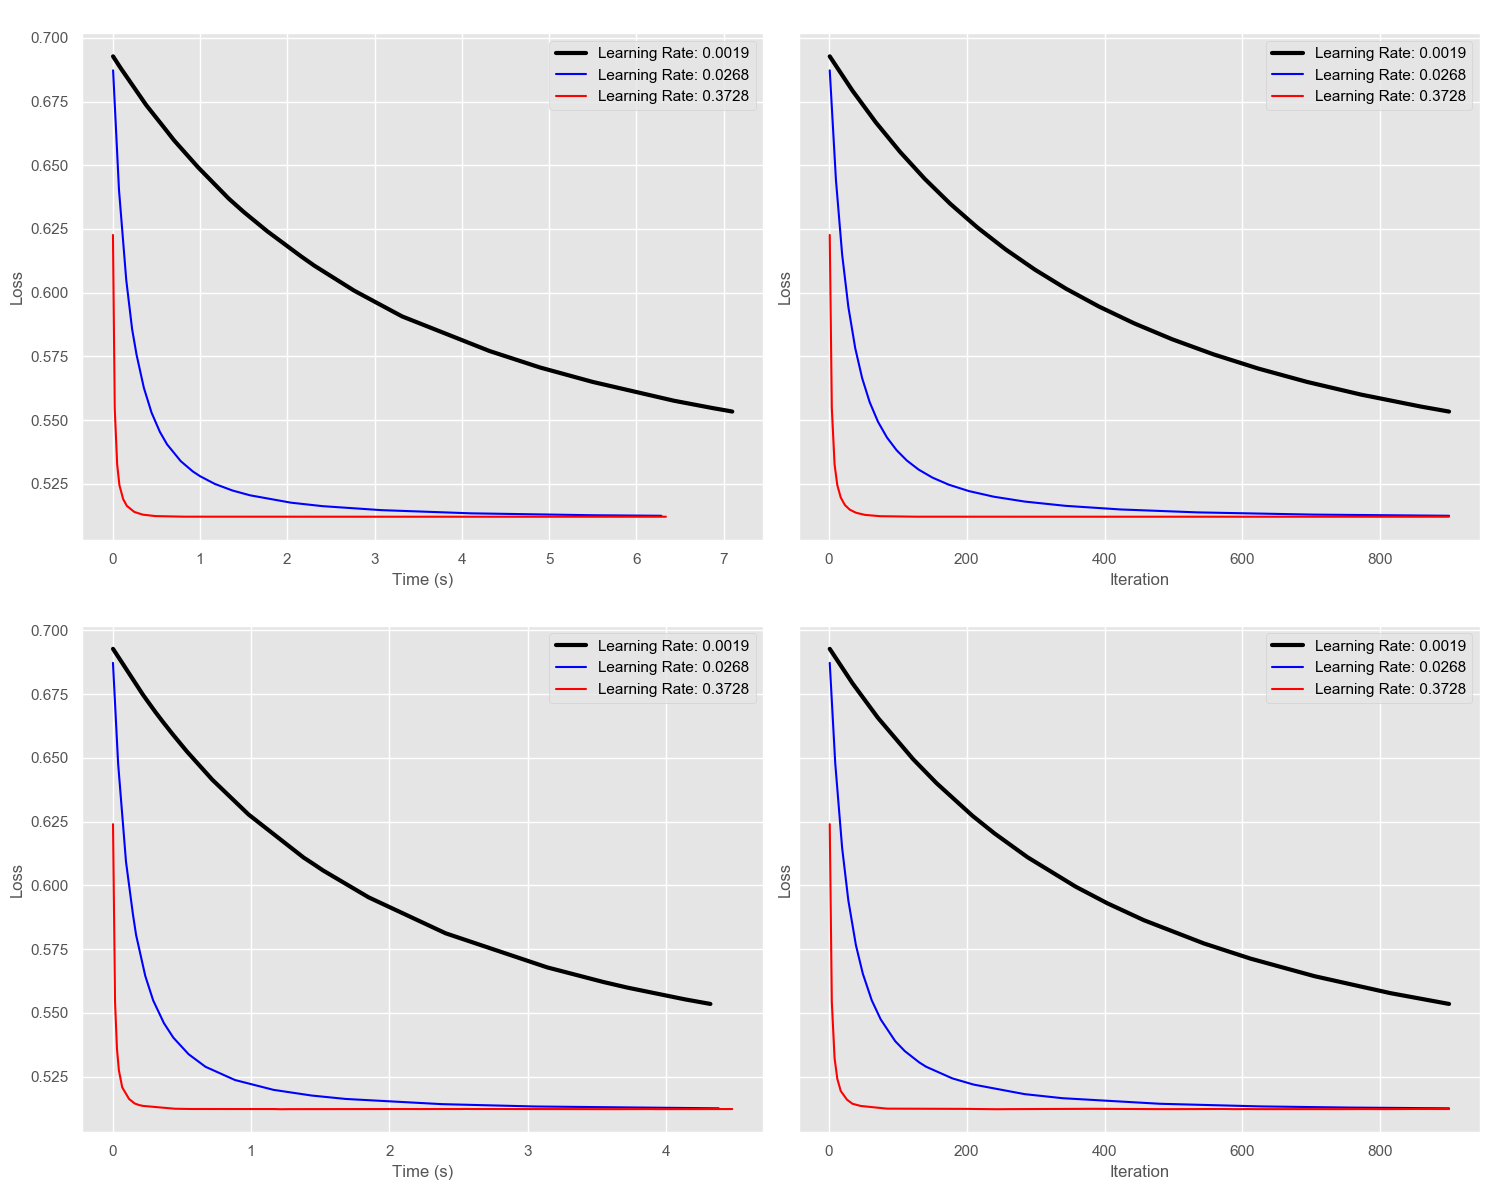

In [328]:
#Да, я использовал гпт. Но задание я изначально выполнил сам, просто попросил переписать копипасту. 

df_history_GD = [pd.DataFrame(history) for history in all_history[1]]
df_history_SGD = [pd.DataFrame(history) for history in all_history[2]]

# Вычисляем кумулятивное время и переименовываем столбец потерь
for df in df_history_GD:
    df["cum_time"] = df[1].cumsum()
    df["loss"] = df[0]
for df in df_history_SGD:
    df["cum_time"] = df[1].cumsum()
    df["loss"] = df[0]


def plot_history(ax, df_list, x_source: str, title: str):
    """
    Строит графики зависимости loss от x_source для набора DataFrame.
    
    Parameters:
        ax: объект оси matplotlib
        df_list: список DataFrame с историей обучения
        x_source: строка "cum_time" или "iteration" - какая ось x используется
        title: заголовок графика
    """
    colors = ['k', 'b', 'r']
    for idx, color in zip([2, 3, 4], colors):
        if x_source == "cum_time":
            x = df_list[idx]["cum_time"]
            xlabel = "Time (s)"
        elif x_source == "iteration":
            x = df_list[idx].index + 1
            xlabel = "Iteration"
        ax.plot(x, df_list[idx]["loss"], color=color,
                linewidth=3 if color == 'k' else 1.5,
                label=f'Learning Rate: {round(learning_rate_list[idx], 4)}')
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Loss")
    ax.set_title(title)
    leg = ax.legend()
    plt.setp(leg.get_texts(), color='k')


# Создаем фигуру с 2 рядами и 2 колонками, разделяя ось y по рядам
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12), sharey='row')

# Графики для модели Gradient Descent (GD)
plot_history(axes[0, 0], df_history_GD, "cum_time", "GD: Loss vs Cumulative Time")
plot_history(axes[0, 1], df_history_GD, "iteration", "GD: Loss vs Iteration")

# Графики для модели Stochastic Gradient Descent (SGD)
plot_history(axes[1, 0], df_history_SGD, "cum_time", "SGD: Loss vs Cumulative Time")
plot_history(axes[1, 1], df_history_SGD, "iteration", "SGD: Loss vs Iteration")

plt.tight_layout()
plt.show()

Какой `learning_rate` стоит выбирать в зависимости от способа обучения модели? Чем плохи маленькие и большие `learning_rate`?

Видно, что быстрее всего (и с наилучшим качеством) справляется красный график (коэф., соответствующий 3.72759372e-01). 
При слишком маленьких Learning Rate уменьшение ошибки происходит медленно, почти равномерно, а график похож на линейную зависимость. Дождаться завершения можно, но это иррационально. 
При слишком больших же, наоборот, градиент "скачет", и ошибка не имеет тенденции спада, и, от шага к шагу, может и расти, и убывать, потому что, хоть направление градиента и верное, оптимум все равно оказывается далеко. 

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- ff32f56c5ac017a9bbd819e9d918bf17 -->
**4.** Рассмотрите наилучшую модель с предыдущего шага. Визуализируйте значения полученных коэффициентов.

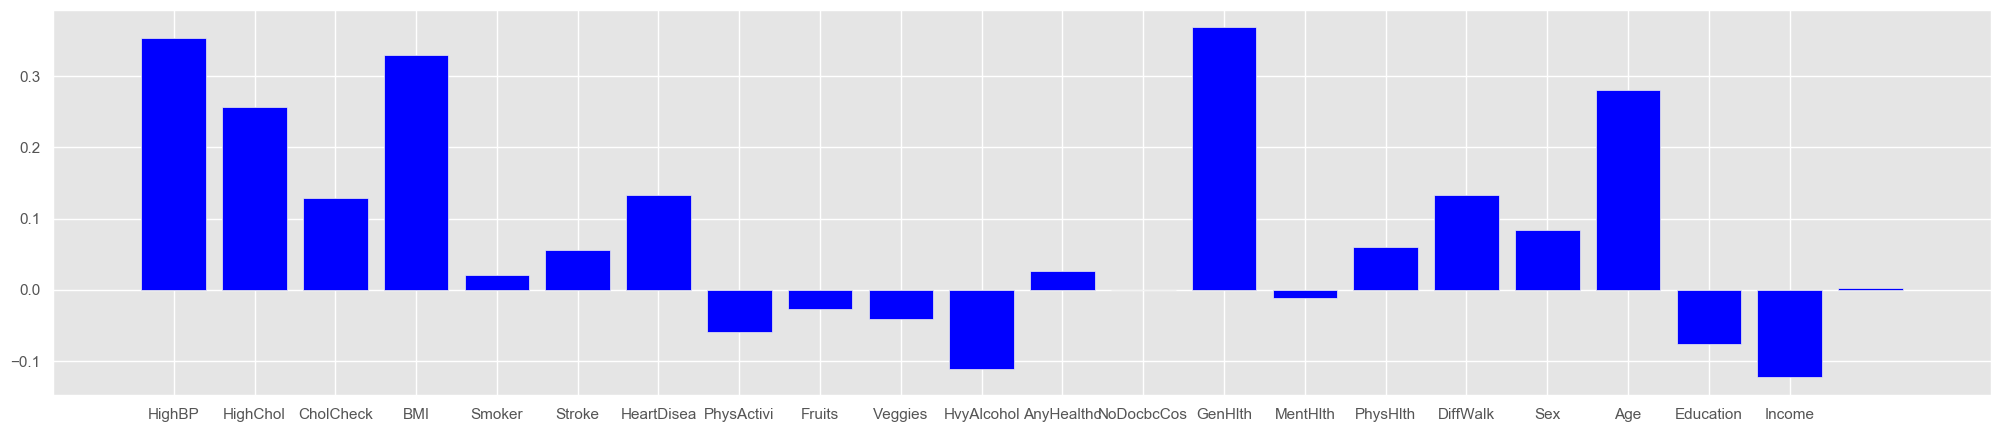

In [314]:
plt.style.use('ggplot')
best_model_GD = LogisticRegression(learning_rate=learning_rate_list[4])
best_model_GD.fit(X_train, y_train)
coefficients = best_model_GD.coef_

plt.figure(figsize=(25, 5))
plt.bar(range(len(coefficients)), coefficients, color='blue')
plt.xticks(ticks=range(len(coefficients) - 1), labels=[s if len(s) < 10 else s[:10] for s in X.columns]);

Как можно проинтерпретировать полученные результаты относительно решаемой задачи?

График достаточно легко интерпретировать: Физическая активность, фруктовая диета или образование почти не влияют на вероятность того, выдаст ли модель 1, зато видно, что индекс массы тела, холестерин, качество здоровья (некий неясный показатель) очень сильно влияют на вероятность, что, впрочем, соответствует эмпирическим данным. 

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- d9db1dced64c0f75bb370e31595d818c -->
**5.** Сравните данную модель с бейзлайном, который в качестве предсказания выдает самый частый класс на обучающей выборке.

In [329]:
most_popular_class = mode(y_train)
predictions = best_model_GD.predict(X_test)

model_accuracy = accuracy_score(y_test, predictions)
baseline_accuracy = accuracy_score(y_test, [1] * len(y_test))
print("Точность модели (Accuracy):", round(model_accuracy, 4))
print("Точность бейзлайна (Accuracy):", round(baseline_accuracy, 4))


Точность модели (Accuracy): 0.7443
Точность бейзлайна (Accuracy): 0.4986


Насколько хорошее получилось качество обученной модели?

Очень неплохое. Если пытаться обучать через RandomForest, получится примерно такое же качество, а CatBoost выдаёт даже хуже!

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 66af3107d46e304b4ec5d685643fa588 -->
**6.** В исходной выборке оставьте два вещественных признака, которые имеют наибольшее влияние на предсказание в предыдущем пункте. Обучите на них модель на 10000 итерациях. Визуализируйте предсказание класса $1$ для нескольких промежуточных итераций.

In [330]:
iters = [10, 20, 500, 1000, 5000, 10000]

Максимально достижимая точность:  0.6946743051135158


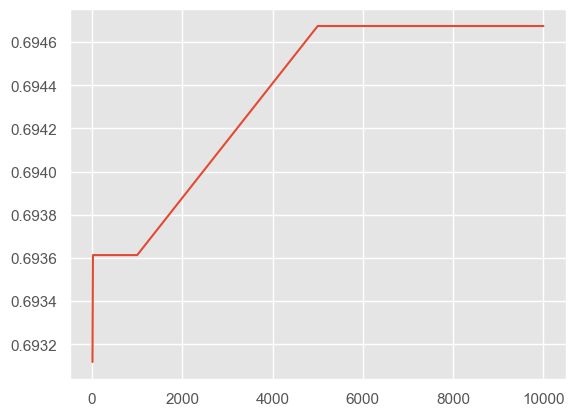

In [333]:
results = []
for iter in iters:
    model = LogisticRegression(max_iter=iter, method="sgd", batch_size=64 * 50, tol=4e-2)
    model.fit(X_train[:, [3, 13]], y_train)
    predictions = model.predict(X_test[:, [3, 13]])
    results.append(accuracy_score(y_test, predictions))
print("Максимально достижимая точность: ", max(results))
plt.plot(iters, results);

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- da9c6c1a8068b61752e22c8d3afc9f51 -->
**Вывод:**

Наилучшая достижимая точность упала только на 5% (впрочем, это не мало). А оптимальное количество итераций оказалось равным 1000. (Написано, что надо визуализировать предсказания класса. Я плохо понимаю, что надо сделать. Пожалуйста, не снимайте баллы, я привел график зависимости количества итераций от качества, тоже полезно)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- d11a6aa59c615661078a02a0c9fe90c8 -->
---
### Задача 6.

В этой задаче вам предлагается реализовать регрессию Хьюбера, а также применить ее к данным с выбросами. Для начала реализуйте класс по шаблону снизу. Обратите внимание, что класс `HuberRegression` &mdash; наследник класса `BaseEstimator`, это с легкостью позволит использовать наш класс в различных пайплайнах библиотеки `sklearn`.

**1.** Задача оптимизации для регрессии Хьюбера выглядит следующим образом:
$$\sum_{i=1}^n R\left(Y_i - x_i^T\theta\right) \rightarrow \min_\theta,$$
где $R(x)$ &mdash; функция потерь Хьюбера, определяемая как
$$R(x) = \frac{x^2}{2} I\left\{|x| < c\right\} + c \left(|x| - \frac{c}{2}\right)I\left\{|x| > c\right\}.$$

Выпишите формулы для градиентного и стохастического градиентного спусков. В чем польза такой функции потерь?

x, if |x| < c

c * signum(x), else. x != 0


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 7564b9fdf7abe57af71d5144cdd94483 -->
**2.** Реализуем теперь класс. **При реализации класса запрещено пользоваться ИИ-инструментами.**

In [10]:
# При реализации класса запрещено пользоваться ИИ-инструментами.

class HuberRegression(BaseEstimator):
    """Класс, реализующий линейную регрессию с функцией потерь Хьюбера."""

    def __init__(self, c: float = 1.0, fit_intercept: bool = True, max_iter: int = 1000,
                 learning_rate: float = 0.5) -> None:
        """Инициализирует модель.

        Параметры: c (float): Константа из функции потерь Хьюбера.
        fit_intercept (bool): Добавлять ли константный признак. 
        max_iter (int): Максимальное число итераций оптимизации.
        """
        self.n_iter_ = 0
        self.intercept_ = None
        self.c = c
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter
        self.coef_ = None
        self.learning_rate = learning_rate

    def _add_intercept(self, X: np.ndarray) -> np.ndarray:
        """Добавляет свободный коэффициент к матрице признаков.

        Параметры: X (np.ndarray): Исходная матрица признаков.

        Возвращает: np.ndarray: Матрица X с добавленным свободным
        коэффициентом.
        """
        X_copy = np.full((X.shape[0], X.shape[1] + 1), fill_value=1.0)
        X_copy[:, :-1] = X
        return X_copy

    def fit(self, X: np.ndarray, y: np.ndarray) -> "HuberRegression":
        """Обучает модель.

        Параметры:
        X (np.ndarray): Матрица признаков.
        y (np.ndarray): Вектор целевой переменной.

        Возвращает:
        HuberRegression: Обученная модель.
        """
        if X.shape[0] != y.shape[0]:
            raise ValueError("Количество строк в X и y должно совпадать")

        # X_for_grad = X
        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()
        self.coef_ = np.zeros(X_copy.shape[1])

        for epoch in range(self.max_iter):
            err = y - X_copy @ self.coef_
            dr = np.where(np.abs(err) < self.c, err, self.c * np.sign(err))
            grad = -(X_copy.T @ dr) / X.shape[0]
            self.coef_ = self.coef_ - self.learning_rate * grad
            self.n_iter_ += 1

        if self.fit_intercept:
            self.intercept_ = self.coef_[-1]  # Свободный коэффициент
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Делает предсказание на новых данных.

        Параметры: X (np.ndarray): Матрица признаков.

        Возвращает: np.ndarray: Вектор предсказанных значений.
        """

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        if X_copy.shape[1] != self.coef_.shape[0]:
            raise ValueError("Число признаков в X не соответствует числу коэффициентов модели")

        pred = X_copy @ self.coef_
        return pred

    def loss(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        err = y_true - y_pred
        return np.mean(np.where(np.abs(err) < self.c, 0.5 * err ** 2, self.c * (np.abs(err) - 0.5 * self.c)))

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 6a5cd74170aac817f849878e6dc1d059 -->
**3.** Загрузите данные из файлов `train.csv`, `test.csv`. Не забудьте, что всю аналитику, а также процесс обучения и подбор гиперпараметров необходимо выполнять на обучающей выборке.

In [6]:
train_df, test_df = pd.read_csv("../data/train.csv"), pd.read_csv("../data/test.csv")

Посмотрите на зависимость целевой переменной от каждого признака.

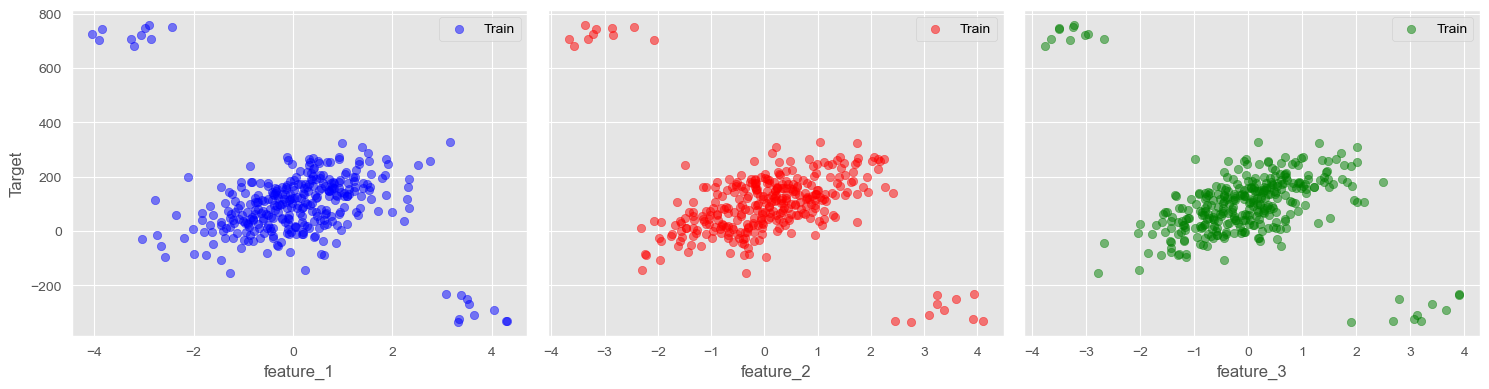

In [7]:
plt.style.use("ggplot")
features = ['feature_1', 'feature_2', 'feature_3']
colors = ['blue', 'red', 'green']

fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 4), sharey=True)
for i, feature in enumerate(features):
    axes[i].scatter(train_df[feature], train_df['target'], color=colors[i], alpha=0.5, label='Train')
    axes[i].set_xlabel(feature)
    if i == 0:
        axes[i].set_ylabel('Target')
    leg = axes[i].legend()
    for text in leg.get_texts():
        text.set_color("k")

plt.tight_layout()
plt.show()

X_train, X_test = train_df[features], test_df[features]
y_train, y_test = train_df['target'], test_df['target']

Что можно сказать о наличии возможных выбросов? Какое влияние они могут оказать? 

Выбросами будем считать значения в "островках" по углам: меньше -200, больше 600. Из-за выбросов коэффициенты могут (и будут) быть смещены, пытаясь предсказать, лежит ли элемент в "островке", что породит промежуточные, а значит (в соответствии с нашим распределением), ошибочные значения. Если кратко: вырастет лосс при решении МНК.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 4a0c605a165e9e55e65c095ad5963e4c -->
**4.** Обучите простую линейную регрессию и посчитайте качество на тестовой выборке по метрике [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error).

In [15]:
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)
simple_model_predictions = simple_model.predict(X_test)
print(f"Mean Squared Error score: {mean_squared_error(simple_model_predictions, y_test)}\n"
      f"R^2 Error score: {r2_score(simple_model_predictions, y_test)}")


Mean Squared Error score: 17025.806610128937
R^2 Error score: -14.186223459602084


Что можно сказать о качестве нашей модели?

Точность по MSE кажется большой, а скор по R2 показывается, что модель не смогла выявить природу закономерности. Видно, что обычная линейная регрессия, работающая по МНК, из-за соответствующей функции потерь, плохо подходит для решения задачи. 

**5.** Теперь обучите линейную регресcию Хьюбера и посчитайте качество на тестовой части по метрикe MSE.

In [32]:
huber_model = HuberRegression(c=42, max_iter=1000, fit_intercept=True, learning_rate=0.5)
huber_model.fit(X_train, y_train)
predictions = huber_model.predict(X_test)
print(f"Hubert's Mean Squared Error score: {mean_squared_error(y_test, predictions)}\n"
      f"Hubert's R^2 Error score: {r2_score(y_test, predictions)}")

Hubert's Mean Squared Error score: 321.4400060110457
Hubert's R^2 Error score: 0.9645916226260355


Что изменилось?

Регрессия Хьюберта почти идеально предсказывает значения классов, ведь она подстроилась под выбросы. Использование регрессию Хьюберта вполне может быть обоснованно в некоторых ситуациях.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2154c451eb280ed839063dce469f6931 -->
**6.** Для обучающей выборки постройте два графика (по графику на каждую модель), на которых изобразите зависимость истинного и предсказанного значения таргета от каждого признака.

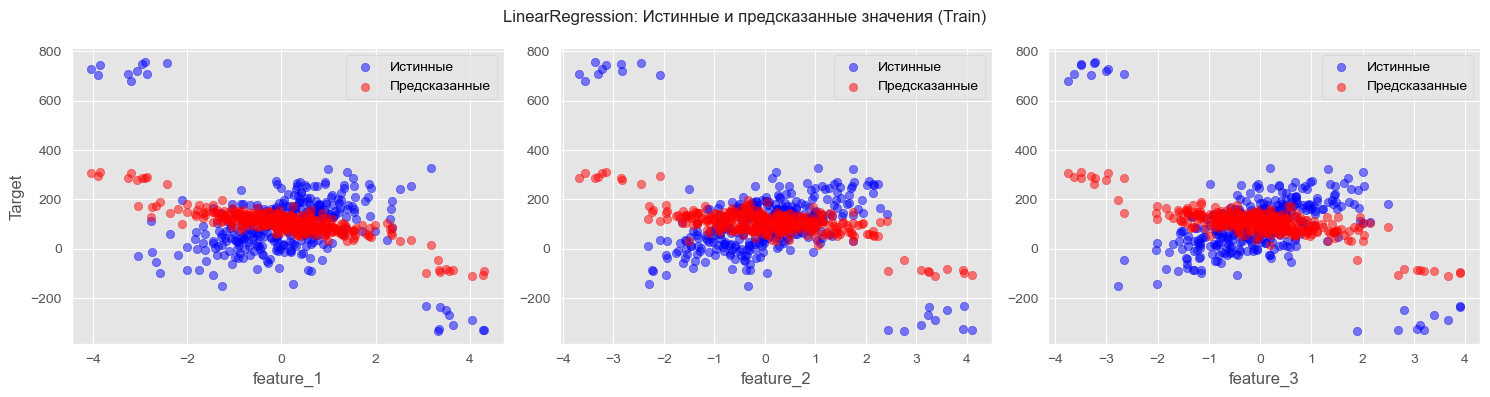

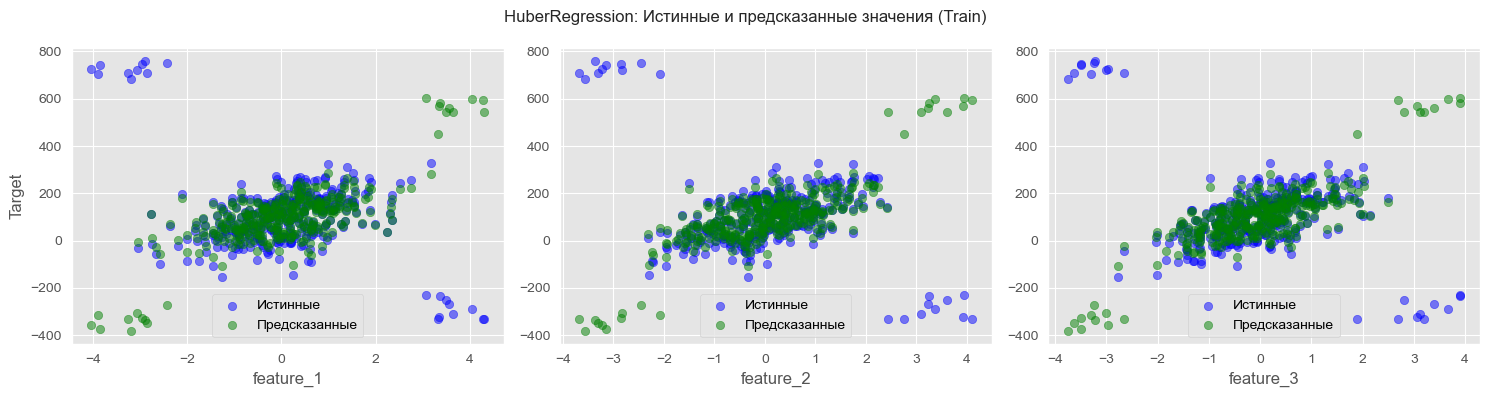

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 4))
fig.suptitle("LinearRegression: Истинные и предсказанные значения (Train)")

simple_model_predictions = simple_model.predict(X_train)

for i, feature in enumerate(features):
    ax = axes[i]
    ax.scatter(X_train[feature], y_train, color='blue', alpha=0.5, label='Истинные')
    ax.scatter(X_train[feature], simple_model_predictions, color='red', alpha=0.5, label='Предсказанные')
    ax.set_xlabel(feature)
    if i == 0:
        ax.set_ylabel("Target")
    leg = ax.legend()
    for text in leg.get_texts():
        text.set_color("k")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 4))
fig.suptitle("HuberRegression: Истинные и предсказанные значения (Train)")

predictions = huber_model.predict(X_train)

for i, feature in enumerate(features):
    ax = axes[i]
    ax.scatter(X_train[feature], y_train, color='blue', alpha=0.5, label='Истинные')
    ax.scatter(X_train[feature], predictions, color='green', alpha=0.5, label='Предсказанные')
    ax.set_xlabel(feature)
    if i == 0:
        ax.set_ylabel("Target")
    leg = ax.legend()
    for text in leg.get_texts():
        text.set_color("k")

plt.tight_layout()
plt.show()


Что можно заметить на этих графиках?

Видно, что Хьюберт очень сильно подстроился под выбросы и пытается предсказывать именно их, в то время как линейная регрессия с функцией потерь MSE значительно более робастна к выбросам

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 90cceb512579b67df499239e31ee0e3a -->
**7.** Обучите регрессию Хьюбера на данных из задачи 2 и сравните качество модели с простой линейной регрессией, которую вы построили в задаче 2.

In [35]:
days_pd = pd.read_csv('../data/day.csv')

lower_bound = days_pd['cnt'].quantile(q=0.03)
upper_bound = days_pd['cnt'].quantile(q=0.97)  # some small feature инжениринг
days_pd = days_pd[(days_pd['cnt'] >= lower_bound) & (days_pd['cnt'] <= upper_bound)]

days_features, days_targets = days_pd[
    ["season", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"]], days_pd[
    'cnt']

X_days_train, X_days_test, y_days_train, y_days_test = train_test_split(days_features, days_targets, test_size=0.2,
                                                                        random_state=42)

huber_model = HuberRegression(max_iter=9000, fit_intercept=False, learning_rate=1e-2)
huber_model.fit(X_days_train, y_days_train)

predictions = huber_model.predict(X_days_test)

scores = pd.DataFrame({
    "RMSE": np.sqrt(mean_squared_error(y_days_test, predictions)),
    "MAE": mean_absolute_error(y_days_test, predictions),
    "MAPE": mean_absolute_percentage_error(y_days_test, predictions),
    "MSE": mean_squared_error(y_days_test, predictions),
    "R_Squared": r2_score(y_days_test, predictions)}, index=[0])
scores


,RMSE,MAE,MAPE,MSE,R_Squared
0,2044.236018,1620.55242,0.450905,4.178901e+06,-0.309648


**Вывод:**

Ошибки значительно выросли. Если дальше уменьшать лернинг рейт, предсказания будут околоконстантные (хоть и ошибки уменьшатся). 

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 38dcbf8dc11db564c7513c7f0e5c8e0d -->
---
### Задача 7.


Рассмотрим модель одномерной регрессии $y(x) = \theta x$, где $x \in \mathbb{R}$ &mdash; одномерный признак, $y \in \mathbb{R}$ &mdash; целевой признак, $\theta \in \mathbb{R}$ &mdash; неизвестный параметр. Имеется выборка размера $n$, полученная по правилу
	$$Y_i = \theta x_i + \varepsilon_i,\ \ \ i=1,...,n,$$
где $\varepsilon_i$ &mdash; случайная ошибка измерений.

Предложите точный алгоритм поиска оценки параметра $\theta$ методом наименьших модулей, то есть $$\sum_{i=1}^n \left|Y_i - \theta x_i\right| \to \min_\theta,$$ работающий за время $O(n \log n)$. Приведите его описание и теоретическое обоснование. Реализация в коде не требуется.

**Решение:**
Пусть дана выборка $\{(x_i, y_i)\}_{i=1}^n$, полученная по модели
$$
y_i = \theta x_i + \varepsilon_i,
$$
Заметим, что функция
$$
R(\theta) = \sum_{i=1}^n \left| y_i - \theta x_i \right|
$$
является кусочно-линейной по $\theta$. Изломы графика происходят в точках
$$
\theta_i = \frac{y_i}{x_i} \quad \text{при} \quad x_i \neq 0,
$$
где происходит изменение знака выражения $y_i - \theta x_i$. Слагаемые с $x_i = 0$ не зависят от $\theta$ и влияют лишь на уровень $R(\theta)$, но не на положение минимума.

Суть метода состоит в следующем. Вычислив все точки $\theta_i$, сортируем их по возрастанию. На каждом интервале между соседними $\theta_i$ функция $R(\theta)$ линейна, поэтому глобальный минимум достигается там, где её производная
$$
\frac{dR}{d\theta} = -\sum_{i=1}^n x_i\,\mathrm{sign}(y_i - \theta x_i)
$$
меняет знак с отрицательного на положительный или равна нулю на отрезке. При переходе через точку $\theta_i$ соответствующий слагаемый меняет знак, что позволяет эффективно обновлять производную. Основная вычислительная сложность алгоритма заключается в сортировке, которая занимает $O(n\log n)$ операций.

Таким образом, точное решение находится за $O(n\log n)$ времени.
 
Если минимум достигается на интервале, можно выбрать любое $\theta$ из него (например, середину интервала).